In [1]:
import os 
os.chdir("../../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate

ms = load_from_json(deepcopy(math_spec_json))
msi = ms.build_implementation(params_base)

Placeholder has no control action options


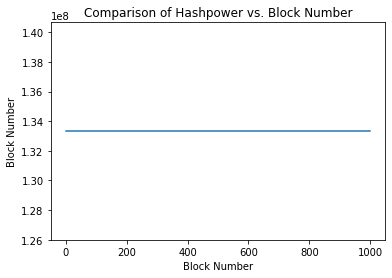

In [2]:
import matplotlib.pyplot as plt

state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate], parameter_preperation_functions=[])
block = list(range(1001))
hashpower = []

for x in block:
    state["Block Number"] = x
    hashpower.append(msi.blocks["Mine Block Boundary Action"](state, params, [])[0]["Aggregate Hashpower"])


plt.plot(block, hashpower)
plt.xlabel("Block Number")
plt.ylabel("Block Number")
plt.title("Comparison of Hashpower vs. Block Number")
plt.show()

In [3]:
msi.blocks["Update Block Difficulty Mechanism"](state, params, [{"Block Difficulty": 7000}])
print(state["Block Difficulty"])

995000035.0


In [4]:
state["Time"] = 0
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 2
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 3
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 4
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 5
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 6
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

state["Time"] = 365 * 7
print(state["Stateful Metrics"]["Current Lockup Options"](state, params))

{0.038461538461538464: 1, 0.25: 1.035, 0.5: 1.1, 1: 1.25}
{0.038461538461538464: 1, 0.25: 1.0175, 0.5: 1.05, 1: 1.15}
{0.038461538461538464: 1, 0.25: 1.00875, 0.5: 1.025, 1: 1.0625}
{0.038461538461538464: 1, 0.25: 1.004375, 0.5: 1.0125, 1: 1.03125}
{0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}
{0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}
{0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}
{0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}
